# CSA Demonstration Notebook

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import math

from src.pipeline.cuckoosearch import CuckooSearch

In [27]:
ROOT = Path().resolve().parent
RESULTS = ROOT / 'output'

## 1. Example problem
Here we define a fitness function for an example problem that is to be solved. In that regard, we choose the taylor approximation of the sin-function until pi/2 using up to the 5th polynomial.


In [28]:
def taylor_series(x, a=0, b=0, c=0, d=0, e=0, f=0):
    return a + b*x + c*(x**2) + d*(x**3) + e*(x**4) + f*(x**5)

In [29]:
function_to_approx = math.sin
steps_to_evaluate = np.linspace(start=0, stop=math.pi/2, num=10)

Note, that CSA **passes the parameters to be evaluated as a series** to the fitness function (parameter title from boundaries as indices, values as content).

In [30]:
def taylor_rmse(parameter_set):
    results = [taylor_series(x, **parameter_set) for x in steps_to_evaluate]
    true_values = [function_to_approx(x) for x in steps_to_evaluate]
    
    # calculate rmse:
    errors = [(result - truth) ** 2 for result, truth in zip(results, true_values)]

    return math.sqrt(np.mean(errors))

In [31]:
def plot_taylor_result(parameter_set):
    results = [taylor_series(x, **parameter_set) for x in steps_to_evaluate]
    true_values = [function_to_approx(x) for x in steps_to_evaluate]
    sns.lineplot(data=pd.DataFrame(data={'result': results, 'truth': true_values}, index=steps_to_evaluate))

## 2. Optimisation

### Boundaries & Parameters
The boundaries are necessary input for the CSA algorithm, thereby also the parameters are defined.

We fix some parameters, only fitting the 3rd and 5th polynomial's coefficient.

In [32]:
parameter_labels = ['a',   'b',   'c',   'd',   'e',   'f']
lower_bounds =     [0,     1,     0,     -1,     0,    -1]
upper_bounds =     [0,     1,     0,      1,     0,     1]
# to fix parameters assign equal lower and upper bound

parameter_frame = pd.DataFrame(data=[lower_bounds, upper_bounds], columns=parameter_labels, index=['Lower Bounds', 'Upper Bounds']).T
parameter_frame

,Lower Bounds,Upper Bounds
a,0,0
b,1,1
c,0,0
d,-1,1
e,0,0
f,-1,1


### CSA

In [33]:
lower_bounds = parameter_frame['Lower Bounds']
upper_bounds = parameter_frame['Upper Bounds']

# the fitness_function_list allows for multiple fitness functions. such can also be weighted
# by providing the fitness_weight_list argument
csa = CuckooSearch(lower_bounds, upper_bounds, max_iterations=1000,
                   fitness_function_list=[taylor_rmse],
                   output_path=RESULTS,
                   fitness_memory_size=200,
                   direction="minimization")
# if fitness_memory_size is set to None (default), no fitness memory is used
# a csv with the best solution found is saved to the output path every save_step (training parameter)

Utilising fitness RAM with 200 slots.


In [34]:
csa.nest_frame

Nest,0,1,2,3,4,5,6,7,8,9
a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
b,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d,-0.235101,-0.794212,0.069863,0.403706,0.924960,-0.235825,0.671779,0.751592,-0.233537,0.213437
e,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
f,0.543064,0.231570,-0.964623,0.203052,-0.740054,-0.001044,0.488863,0.677107,0.739527,-0.823484


#### Training

  0%|          | 0/500 [00:00<?, ?it/s]

Iteration:            1 | Best current fitness:     0.14655471507733187
Iteration:            2 | Best current fitness:     0.14655471507733187
Iteration:            3 | Best current fitness:     0.14655471507733187
Iteration:            4 | Best current fitness:     0.14655471507733187
Iteration:            5 | Best current fitness:     0.14655471507733187
Iteration:            6 | Best current fitness:     0.14655471507733187
Iteration:            7 | Best current fitness:     0.14655471507733187
Iteration:            8 | Best current fitness:     0.14655471507733187
Iteration:            9 | Best current fitness:     0.14655471507733187
Iteration:            10 | Best current fitness:     0.14655471507733187
Iteration:            11 | Best current fitness:     0.14655471507733187
Iteration:            12 | Best current fitness:     0.14655471507733187
Iteration:            13 | Best current fitness:     0.14655471507733187
Iteration:            14 | Best current fitness:     0.14655

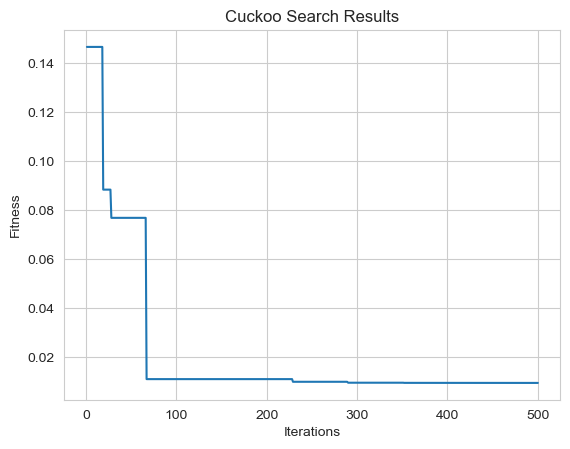

In [35]:
csa(save_step=100, iterations=500)
# if no iterations are defined here, max_iterations from class definition are used

#### Evaluate Solution

In [36]:
csa.best_nest

a    0.000000
b    1.000000
c    0.000000
d   -0.192628
e    0.000000
f    0.019785
Name: 8, dtype: float64

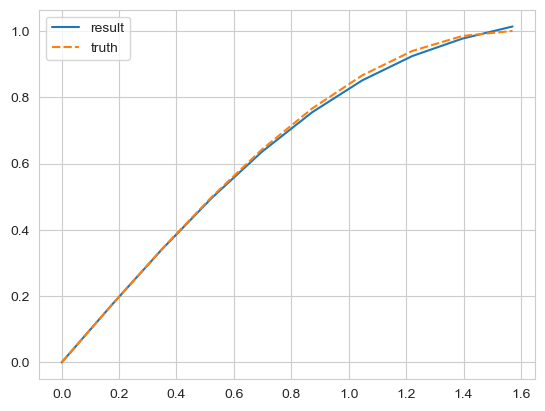

In [37]:
plot_taylor_result(csa.best_nest)

Compared with optimal solution known from manual calculation:

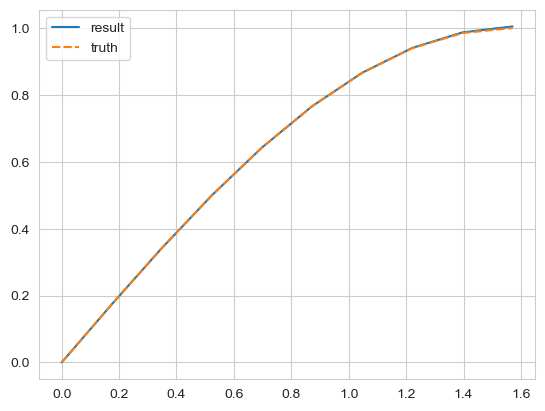

In [38]:
plot_taylor_result({'b': 1, 'd': -1/6, 'f': 1/120})